In [1]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# definer symboler
N, A = sp.symbols('N A', positive=True, real=True)

In [5]:
# Vi definerer produktfn

def prod(c,N,A):
    produksjon=1000*(c.exp(N)/(A+c.exp(N)))
    return produksjon
prod(sp,N,A)

1000*exp(N)/(A + exp(N))

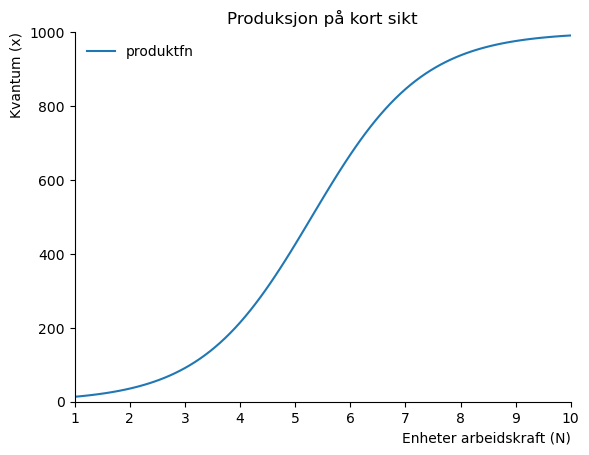

In [6]:
n=np.linspace(1,10,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kvantum (x)', loc='top')
ax.set_xlabel('Enheter arbeidskraft (N)', loc='right')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n, prod(np,n,200), label='produktfn')


# tittel
ax.set_title('Produksjon på kort sikt')

#vis navnene:
ax.legend(loc='best',frameon=False);

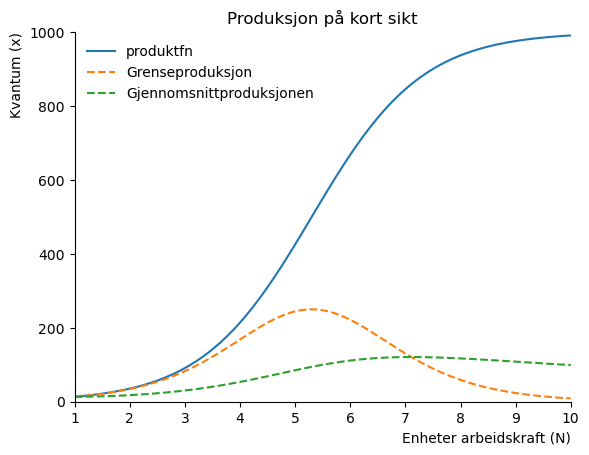

In [11]:
#Definere variablene
N, A = sp.symbols('N A', positive = True, real = True)
c = sp.symbols('c', positive = True, real = True)


#Definere gjennomsnitt- og grenseproduksjonen
def produ(c,N,A):
    produksjon=1000*(sp.exp(N)/(A+sp.exp(N)))
    return produksjon

def prod_der(c,N,A):
    return sp.diff(produ(c,N,A),N)

def gjennom(c,N,A):
    return produ(c,N,A)/N

# Konverter produktfunksjon, gjennosnitt- og grenseproduksjonen 
prod_kon = sp.lambdify((c,N,A), produ(c,N,A))

prod_der_kon = sp.lambdify((c,N,A), prod_der(c,N,A))

gjennom_kon = sp.lambdify((c,N,A), gjennom(c,N,A))


#Plott de nye verdiene i grafen
fig1

derivert_verdi = prod_der_kon(1, n, 200)
ax.plot(n, derivert_verdi, '--', label='Grenseproduksjon')

gjennom_verdi = gjennom_kon(1, n, 200)
ax.plot(n, gjennom_verdi, '--', label='Gjennomsnittproduksjonen')

ax.legend(frameon=False)

plt.show()
fig1

Grafen for grenseproduktiviteten viser tilveksten i produksjonen når vi øker arbeidskraften med 1 time, mens gjennomsnittsproduktiviteten viser forholdet mellom totalproduksjon og den mengen arbeidskraft som blir brukt.

In [24]:
#For å derivere grensekostnaden
Topp_p=sp.simplify(sp.diff(prod_der(c,N,A),N))
Topp_p

1000*((A + exp(N))**2 - 3*(A + exp(N))*exp(N) + 2*exp(2*N))*exp(N)/(A + exp(N))**3

In [26]:
#Finne null punkt, verdien av N hvov 
sol=sp.solve(Topp_p,N)[0]
sol

log(A)